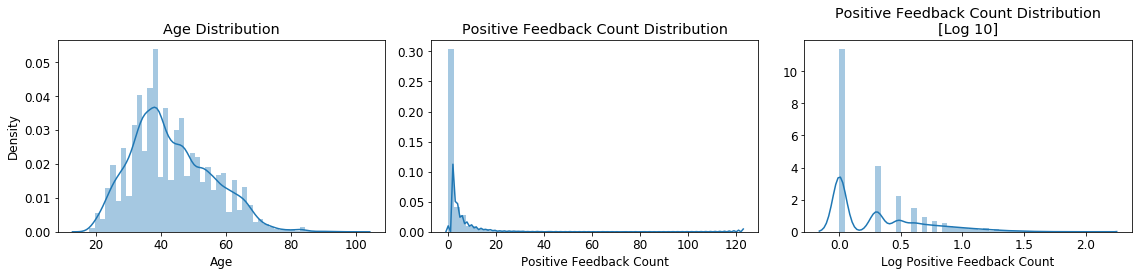

In [3]:
#Age and Positive Feedback Frequency Distributions
import matplotlib.pyplot as plt
import nltk
import numpy as np
import pandas as pd
import seaborn as sns
df = pd.read_csv("/Users/a.bsurekha/Downloads/dataset.csv", index_col=0)
f, ax = plt.subplots(1, 3, figsize=(16, 4), sharey=False)
sns.distplot(df.Age, ax=ax[0])
ax[0].set_title('Age Distribution')
ax[0].set_ylabel('Density')
sns.distplot(df['Positive Feedback Count'], ax=ax[1])
ax[1].set_title('Positive Feedback Count Distribution')
sns.distplot(np.log10((df['Positive Feedback Count'][df['Positive Feedback Count'].notnull()] + 1)), ax=ax[2])
ax[2].set_title('Positive Feedback Count Distribution\n[Log 10]')
ax[2].set_xlabel('Log Positive Feedback Count')
plt.rcParams.update({'font.size': 12})
plt.tight_layout()
plt.savefig('age-and-positive-feedback-freqdist.png', format='png', dpi=600)
plt.show()


In [4]:
#word count
from sklearn.feature_extraction.text import CountVectorizer
df['Review Text'] = df['Review Text'].fillna('')
vectorizer = CountVectorizer()
# assign a shorter name for the analyze
# which tokenizes the string
analyzer = vectorizer.build_analyzer()

def wordcounts(s):
    c = {}
    # tokenize the string and continue, if it is not empty
    if analyzer(s):
        d = {}
        # find counts of the vocabularies and transform to array 
        w = vectorizer.fit_transform([s]).toarray()
        # vocabulary and index (index of w)
        vc = vectorizer.vocabulary_
        # items() transforms the dictionary's (word, index) tuple pairs
        for k,v in vc.items():
            d[v]=k # d -> index:word 
        for index,i in enumerate(w[0]):
            c[d[index]] = i # c -> word:count
    return  c

# add new column to the dataframe
df['Word Counts'] = df['Review Text'].apply(wordcounts)
df.head(11)

,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,Word Counts
0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,"{'absolutely': 1, 'and': 2, 'comfortable': 1, ..."
1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,"{'am': 1, 'and': 2, 'bc': 2, 'be': 1, 'below':..."
2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,"{'and': 3, 'be': 1, 'bottom': 1, 'but': 2, 'ch..."
3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants,"{'and': 1, 'but': 1, 'compliments': 1, 'every'..."
4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses,"{'adjustable': 1, 'all': 1, 'and': 1, 'any': 1..."
5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses,"{'0p': 1, 'alterations': 1, 'am': 1, 'and': 4,..."
6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits,"{'aded': 1, 'all': 1, 'am': 1, 'and': 3, 'as':..."
7,858,39,"Shimmer, surprisingly goes with lots","I ordered this in carbon for store pick up, an...",4,1,4,General Petite,Tops,Knits,"{'already': 1, 'also': 1, 'always': 1, 'and': ..."
8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses,"{'an': 1, 'and': 1, 'bust': 1, 'but': 1, 'dres..."
9,1077,34,Such a fun dress!,"I'm 5""5' and 125 lbs. i ordered the s petite t...",5,1,0,General,Dresses,Dresses,"{'125': 1, '34b': 1, 'an': 1, 'and': 1, 'busty..."


In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
#from wordcloud import WordCloud
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from PIL import Image

In [7]:
clothes_data = pd.read_csv("/Users/a.bsurekha/Downloads/dataset.csv")
clothes_data.head().T

,0,1,2,3,4
Unnamed: 0,0,1,2,3,4
Clothing ID,767,1080,1077,1049,847
Age,33,34,60,50,47
Title,NaN,NaN,Some major design flaws,My favorite buy!,Flattering shirt
Review Text,Absolutely wonderful - silky and sexy and comf...,Love this dress! it's sooo pretty. i happene...,I had such high hopes for this dress and reall...,"I love, love, love this jumpsuit. it's fun, fl...",This shirt is very flattering to all due to th...
Rating,4,5,3,5,5
Recommended IND,1,1,0,1,1
Positive Feedback Count,0,4,0,0,6
Division Name,Initmates,General,General,General Petite,General
Department Name,Intimate,Dresses,Dresses,Bottoms,Tops


In [8]:
age = pd.cut(clothes_data['Age'],bins = [0, 25, 45, 60, 75, 100],labels = ['<=100', '<=75', '<=60', '<=45', '<=25',])
print("Different Age Group Count:")
print(age.value_counts().sort_values())

Different Age Group Count:
<=25       167
<=100     1223
<=45      2270
<=60      6682
<=75     13144
Name: Age, dtype: int64


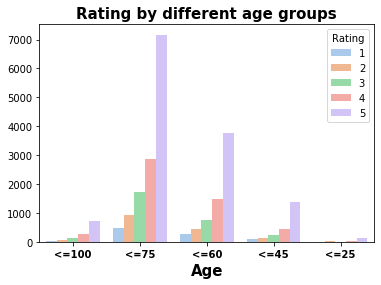

In [9]:
sns.countplot(x=age,hue=clothes_data['Rating'], palette = sns.color_palette('pastel', 5))
plt.title("Rating by different age groups",fontsize=15,fontweight='bold')
plt.ylabel("")
plt.xlabel('Age',fontsize=15,fontweight='bold')
plt.xticks(fontsize=10,fontweight='bold')
plt.show()